In [33]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm

import pickle
from scipy import stats

import seaborn as sns

from scipy.special import kolmogorov, erf
from scipy.special import gamma, factorial
from scipy.optimize import minimize, Bounds

$W_{\Lambda / \overline{\Lambda}} (\xi) = \digamma_0(\xi)+\alpha_{\Lambda / \overline{\Lambda}}\sqrt{1-\alpha^2}\sin (\Delta \Phi)\digamma_1(\xi)+\alpha\digamma_2(\xi) $

$\digamma_0(\xi)=1$

$\digamma_1(\xi)=\sin \theta \cos \theta \cos\theta_p$

$\digamma_2(\xi)=\cos ^2 \theta$

$\xi = (\theta,\theta_p)$

$\beta = (\alpha, \alpha_{\Lambda / \overline{\Lambda}}\sin (\Delta \Phi))$

In [39]:
 def SingleTagDistribution_OneFrame(x, params):
    """ x - vector of values [costheta,sintheta,sintheta1, sinphi1]  """
    alpha, alpha_sinphi = params
    costheta,sintheta,sintheta1, sinphi1 = x
    
    distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*sintheta*sintheta1*sinphi1
    
    return distr 

def LogLikelihood(params, data=[], func=SingleTagDistribution_OneFrame):  
    l = 0
    for i in range(len(data)):
        l+= np.log(func(data[i,:], params)) 
    #print(l, params)
    return l

def Maximize_LogLikelihood(params, data=[], func=SingleTagDistribution_OneFrame):
    print(params)
    return -LogLikelihood(params, data, func)

In [4]:
def TLorentzVector_Boost(vector,boost):
    bx, by,bz = boost
    x,y,x = vector
    #Boost this Lorentz vector
    b2 = bx*bx + by*by + bz*bz
    gamma = 1.0 /np.sqrt(1.0 - b2)
    bp = bx*X() + by*Y() + bz*Z()
    if  b2 > 0 :
        gamma2 = (gamma - 1.0)/b2
    else:
        gamma2 = 0.0

    x = x + gamma2*bp*bx + gamma*bx*T()
    y = y + gamma2*bp*by + gamma*by*T()
    z = z + gamma2*bp*bz + gamma*bz*T()
    #SetT(gamma*(T() + bp)); energy 
                         
    return np.array([x,y,z])


In [56]:
def SingleTag_generator(N, params):
    #theta = np.random.uniform(-np.pi, np.pi)
    alpha, alpha_sinphi = params
    max_=0.6
    upper = 1 + np.abs(alpha) + np.sqrt( 1 - np.abs(alpha)*np.abs(alpha) )*max_
    i=0
    samples = np.zeros((N,4))
    k=0
    while(i<N):
        k+=1
        costheta = np.random.uniform(-1, 1)
        sintheta = np.random.choice([-1,1])*np.sqrt((1-costheta*costheta))
        sintheta1 = np.random.uniform(-1, 1)
        #sinphi1 = np.random.uniform(-1, 1)
        phi1 = np.random.uniform(-np.pi, np.pi)
        sinphi1 = np.sin(phi1)
        distr = SingleTagDistribution_OneFrame([costheta,sintheta,sintheta1, sinphi1],params)
        #distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*sintheta*sintheta1*sinphi1
        p = np.random.uniform(0, 1)
        if (p<distr/upper):
            samples[i]=[costheta,sintheta,sintheta1, sinphi1]
            #samples[i]=[costheta,costhetap]
            i+=1
    print(k)
    return samples
 

1638


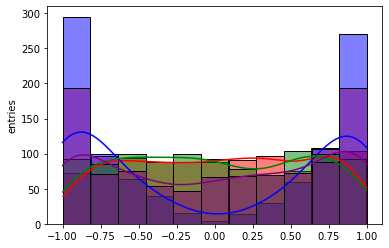

In [60]:
N = 1000
alpha = 0
sinphi = 0.5 

data = SingleTag_generator(N, [ alpha,sinphi])

sns.histplot(data[:,0],    color = "r", label = "result", kde=True, alpha = 0.5)
sns.histplot(data[:,1],    color = "b", label = "result", kde=True, alpha = 0.5)
sns.histplot(data[:,2],    color = "g", label = "result", kde=True, alpha = 0.5)
sns.histplot(data[:,3],    color = "purple", label = "result", kde=True, alpha = 0.5)
#plt.xlabel('$cos(\\theta)$')
plt.ylabel('entries')
plt.show()


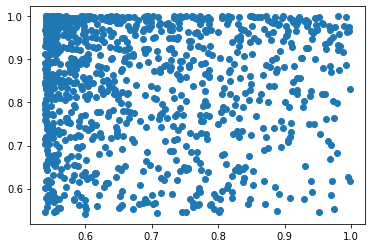

In [61]:
plt.scatter(np.cos(data[:,1]),np.cos(data[:,2]) )




In [62]:
x0 = np.array([0, 0.5])
 
Estimates = minimize(Maximize_LogLikelihood, x0, args=(data[:,:],SingleTagDistribution_OneFrame) )

[0.  0.5]
[1.49011612e-08 5.00000000e-01]
[0.         0.50000001]
[1.00949964 0.46821192]
[1.00949965 0.46821192]
[1.00949964 0.46821193]
[5.04749819 0.34105959]
[5.0474982  0.34105959]
[5.04749819 0.3410596 ]
[21.19949238 -0.16754973]
[21.1994924  -0.16754973]
[21.19949238 -0.16754971]
[85.80746918 -2.201987  ]
[85.80746919 -2.201987  ]
[85.80746918 -2.20198698]
[344.23937634 -10.33973608]
[344.23937635 -10.33973608]
[344.23937634 -10.33973607]
[1377.96700499  -42.89073241]
[1377.967005    -42.89073241]
[1377.96700499  -42.89073239]
[5512.8775196  -173.09471771]
[5512.87751961 -173.09471771]
[5512.8775196 -173.0947177]
[22052.51957803  -693.91065893]
[22052.51957804  -693.91065893]
[22052.51957803  -693.91065891]
[88211.08781175 -2777.17442379]


<ipython-input-39-1bbe2531185c>:6: RuntimeWarning: invalid value encountered in sqrt
  distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*sintheta*sintheta1*sinphi1


[88211.08781176 -2777.17442379]
[88211.08781175 -2777.17442377]
[352845.36074662 -11110.22948323]
[352845.36074664 -11110.22948323]
[352845.36074662 -11110.22948321]
[1411382.45248612  -44442.449721  ]
[1411382.45248614  -44442.449721  ]
[1411382.45248612  -44442.44972098]
[5645530.81944412 -177771.33067207]
[5645530.81944414 -177771.33067207]
[5645530.81944412 -177771.33067206]
[22582124.28727612  -711086.85447637]
[22582124.28727613  -711086.85447637]
[22582124.28727612  -711086.85447635]
[90328498.15860412 -2844348.94969355]
[90328498.15860413 -2844348.94969355]
[90328498.15860412 -2844348.94969353]
[ 3.61313994e+08 -1.13773973e+07]
[ 3.61313999e+08 -1.13773973e+07]
[ 3.61313994e+08 -1.13773973e+07]
[ 1.44525598e+09 -4.55095909e+07]
[ 1.44525600e+09 -4.55095909e+07]
[ 1.44525598e+09 -4.55095909e+07]
[ 5.78102390e+09 -1.82038365e+08]
[ 5.78102399e+09 -1.82038365e+08]
[ 5.78102390e+09 -1.82038365e+08]
[ 2.31240956e+10 -7.28153461e+08]
[ 2.31240960e+10 -7.28153461e+08]
[ 2.31240956e+10

[ 3.37959036e+58 -1.06419748e+57]
[ 3.37959041e+58 -1.06419748e+57]
[ 3.37959036e+58 -1.06419749e+57]
[ 1.35183614e+59 -4.25678991e+57]
[ 1.35183616e+59 -4.25678991e+57]
[ 1.35183614e+59 -4.25678997e+57]
[ 5.40734458e+59 -1.70271596e+58]
[ 5.40734466e+59 -1.70271596e+58]
[ 5.40734458e+59 -1.70271599e+58]
[1.00949964 0.46821192]
[1.00949965 0.46821192]
[1.00949964 0.46821193]
[2.01899927 0.43642384]
[2.01899929 0.43642384]
[2.01899927 0.43642385]
[4.03799855 0.37284767]
[4.03799856 0.37284767]
[4.03799855 0.37284769]
[8.0759971  0.24569534]
[8.07599711 0.24569534]
[8.0759971  0.24569536]
[ 1.61519942e+01 -8.60931759e-03]
[ 1.61519942e+01 -8.60931759e-03]
[ 1.61519942e+01 -8.60930269e-03]
[32.3039884  -0.51721864]
[32.30398841 -0.51721864]
[32.3039884  -0.51721862]
[64.60797679 -1.53443727]
[64.60797681 -1.53443727]


<ipython-input-39-1bbe2531185c>:6: RuntimeWarning: invalid value encountered in sqrt
  distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*sintheta*sintheta1*sinphi1


[64.60797679 -1.53443726]
[129.21595358  -3.56887454]
[129.2159536   -3.56887454]
[129.21595358  -3.56887453]
[258.43190716  -7.63774908]
[258.43190718  -7.63774908]
[258.43190716  -7.63774907]
[516.86381433 -15.77549816]
[516.86381434 -15.77549816]
[516.86381433 -15.77549815]
[1033.72762865  -32.05099633]
[1033.72762867  -32.05099633]
[1033.72762865  -32.05099631]


<ipython-input-39-1bbe2531185c>:6: RuntimeWarning: invalid value encountered in sqrt
  distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*sintheta*sintheta1*sinphi1
